# Shoe Brand Classifier

In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

In [22]:
data_dir = r"S:\ML Project"
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
brands = ['adidas', 'converse', 'nike']


In [23]:
x_train = []
y_train = []
x_test = []
y_test = []


In [24]:
def extract_features(img_path):
    img = imread(img_path)
    gray_img = rgb2gray(img)  
    features = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    return features

In [25]:
for brand in brands:
    brand_dir = os.path.join(train_dir, brand)
    for img_file in os.listdir(brand_dir):
        img_path = os.path.join(brand_dir, img_file)
        features = extract_features(img_path)
        x_train.append(features)
        y_train.append(brand)


for brand in brands:
    brand_dir = os.path.join(test_dir, brand)
    for img_file in os.listdir(brand_dir):
        img_path = os.path.join(brand_dir, img_file)
        features = extract_features(img_path)
        x_test.append(features)
        y_test.append(brand)

In [26]:
def visualize_hog(image_path):
    img = imread(image_path)
    gray_img = rgb2gray(img)
    features, hog_image = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(hog_image, cmap='gray')
    axes[1].set_title('HOG Features')
    axes[1].axis('off')
    
    plt.show()

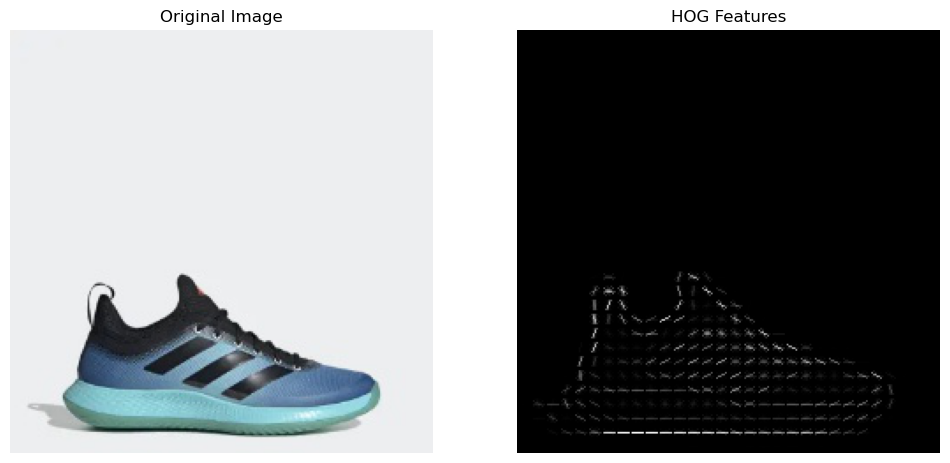

In [27]:
visualize_hog(r"S:\ML Project\train\adidas\38.jpg") # Visualizing HOG features for Adidas Brand

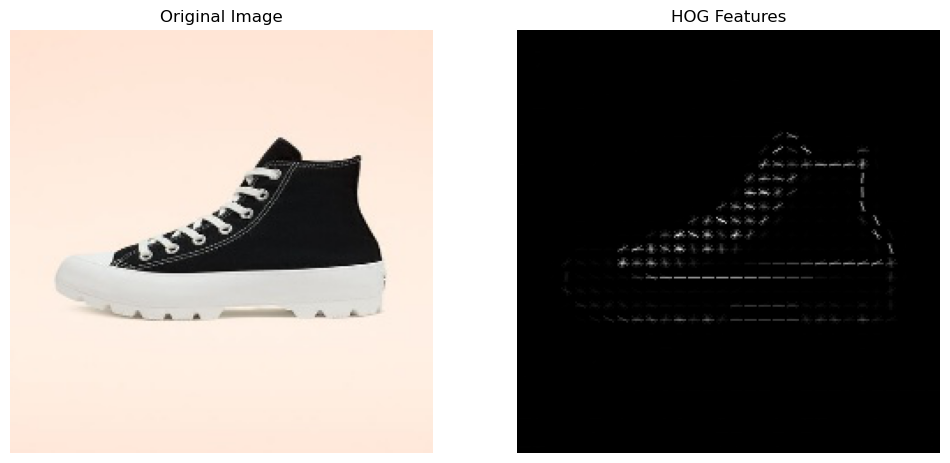

In [28]:
visualize_hog(r"S:\ML Project\train\converse\41.jpg")  # Visualizing HOG features for Converse Brand

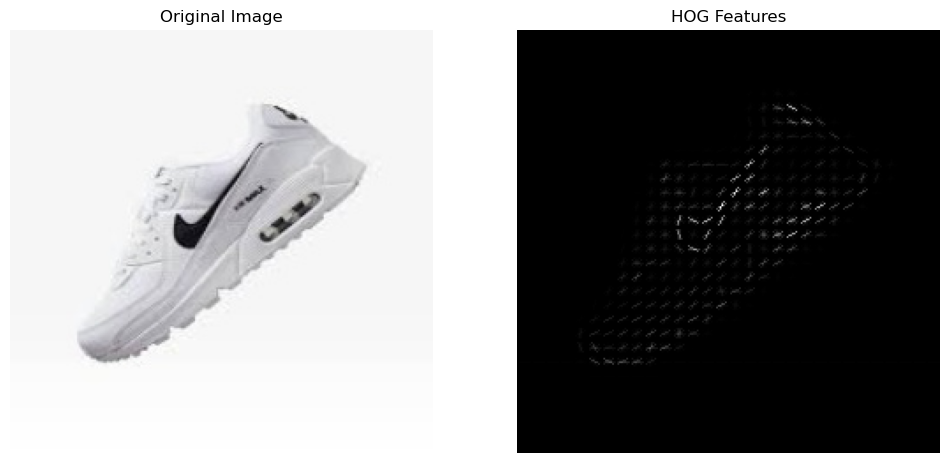

In [29]:
visualize_hog(r"S:\ML Project\train\nike\41.jpg") # Visualizing HOG features for Nike Brand

In [30]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [31]:
df_x_train = pd.DataFrame(x_train)
df_y_train = pd.DataFrame(y_train, columns=['Brand'])

In [32]:
df_x_train

,0,1,2,3,4,5,6,7,8,9,...,30266,30267,30268,30269,30270,30271,30272,30273,30274,30275
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.005707,0.001101,0.003671,0.026624,0.705085,0.022466,0.017418,0.007740,0.000000,0.012671,...,0.040683,0.248987,0.057639,0.248987,0.248987,0.248987,0.103087,0.148926,0.079702,0.163105
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.398412,0.000000,0.398412,0.000000,0.398412,0.000000,0.398412,0.000000,0.000000,0.398412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,0.282779,0.005377,0.010203,0.035635,0.196871,0.092516,0.220628,0.280518,0.094996,0.206992,...,0.111605,0.200088,0.032907,0.093189,0.180581,0.268593,0.160771,0.107788,0.133804,0.061279
707,0.166809,0.021944,0.021617,0.011941,0.123958,0.080594,0.100365,0.135394,0.084239,0.061684,...,0.234169,0.234169,0.120383,0.110383,0.103695,0.215079,0.148476,0.050130,0.087302,0.185270
708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
709,0.229326,0.052384,0.108684,0.060136,0.229326,0.154990,0.079645,0.209025,0.068898,0.144676,...,0.075863,0.233092,0.233092,0.233092,0.117320,0.074639,0.035332,0.052864,0.104933,0.121534


In [33]:
df_y_train

,Brand
0,adidas
1,adidas
2,adidas
3,adidas
4,adidas
...,...
706,nike
707,nike
708,nike
709,nike


In [34]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [35]:
df_y_train = pd.DataFrame(y_train, columns=['Brand'])
df_y_train

,Brand
0,0
1,0
2,0
3,0
4,0
...,...
706,2
707,2
708,2
709,2


In [36]:
svm_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=3, n_jobs=-1)
svm_grid.fit(x_train, y_train)


rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=3, n_jobs=-1)
rf_grid.fit(x_train, y_train)


knn_param_grid = {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=3, n_jobs=-1)
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 10],
                         'weights': ['uniform', 'distance']})

In [37]:
voting_clf = VotingClassifier([('svm', svm_grid.best_estimator_), 
                                ('rf', rf_grid.best_estimator_), 
                                ('knn', knn_grid.best_estimator_)], voting='hard')

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('svm', SVC(C=10, gamma=0.001)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_split=5,
                                                     n_estimators=200)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=3,
                                                   weights='distance'))])

In [38]:
models = [('SVM', svm_grid.best_estimator_), 
          ('Random Forest', rf_grid.best_estimator_), 
          ('KNN', knn_grid.best_estimator_),
          ('Voting Classifier', voting_clf)]

accuracy_scores = []

for name, model in models:
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

SVM Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.67      0.68      0.68        38
           1       0.61      0.66      0.63        38
           2       0.62      0.55      0.58        38

    accuracy                           0.63       114
   macro avg       0.63      0.63      0.63       114
weighted avg       0.63      0.63      0.63       114

Random Forest Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        38
           1       0.59      0.68      0.63        38
           2       0.60      0.55      0.58        38

    accuracy                           0.59       114
   macro avg       0.59      0.59      0.59       114
weighted avg       0.59      0.59      0.59       114

KNN Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.65      0.39      0.49        38
           1       0.77      0.53      0.62        38
        

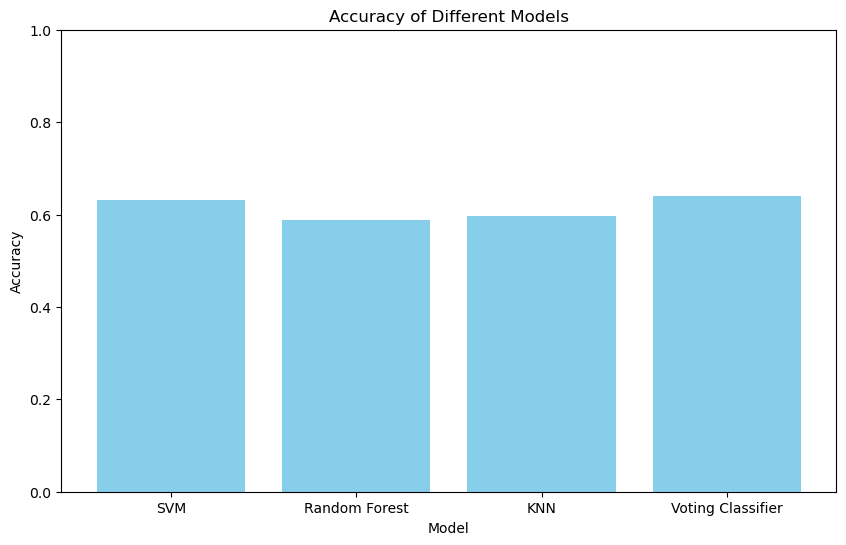

In [39]:
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in models], accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
plt.show()